## Structure
Structure used:

 1. Datasets, and Features Description
 2. Data Preparation
 3. Data Exploration - Explore the data and show you understand its structure and relations
 4. Data Validation - Check the quality of the data. Is it complete? Are there obvious errors?
 5. Data Visualisation - Gain an overall understanding of the data with visualisations
 6. Data Analysis = Set some questions and use the data to answer them
 7. Data Augmentation - Add new data from another source to bring new insights to the data you already have

In [3]:
# Data Preprocessing Libraries
import pandas as pd
import numpy as np

# Data Visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Workspace config.
import warnings
warnings.filterwarnings('ignore')

plt.rc('figure',figsize=(15,10))
sns.set_palette(['#55a3cd', '#4954b0', '#282739', '#3b2127', '#9c2f45', '#e96f36'])

In [1]:
# Utilities functions for project

def assign_na_to_missing_cols(df: pd.DataFrame) -> pd.DataFrame:
    """
    Replace common missing value placeholders with NaN in a DataFrame.

    This function takes a pandas DataFrame and iterates through its columns.
    For each column, it replaces values like 'N/A', 'unknown', '-', None, and empty strings
    with np.nan (NumPy's representation of NaN). This standardizes the representation
    of missing values across the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to process.

    Returns:
    pd.DataFrame: A new DataFrame with standardized missing values.
    """
    df_c = df.copy()
    for column in df.columns:
        df_c[column].replace(['N/A', 'unknown', '-', '',None], np.nan, inplace=True)
    return df_c


def visualise_na_in_missing_cols(df: pd.DataFrame) -> None:
    """
    Visualize missing values in a DataFrame using a heatmap.

    This function takes a pandas DataFrame and creates a heatmap visualization
    using seaborn to show the presence of missing values (NaNs). Each cell in the
    heatmap corresponds to a DataFrame element, with missing values indicated by
    color. This visualization helps in understanding the distribution and extent
    of missing data in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to visualize.

    Returns:
    None: This function does not return anything as its purpose is to show a plot.
    """
    plt.figure(figsize=(6,6))
    sns.heatmap(df.isna().transpose())
    plt.show()

NameError: name 'pd' is not defined

import datasets into workspace

In [ ]:
# CSV imports
reviews_df = pd.read_csv("/content/reviews.csv",error_bad_lines=False)
product_df = pd.read_csv("/content/products.csv")
users_df = pd.read_csv("/content/users.csv")

In [ ]:
# JSON imports
df_json_products = pd.read_json("/content/jcpenney_products.json",lines=True)
reviewers_df = pd.read_json("/content/jcpenney_reviewers.json", lines = True, encoding_errors = "ignore")

In [ ]:
# copy dataframes - best practices
product_df = product_df.copy()
users_df = users_df.copy()
reviews_df = reviews_df.copy()

## 1. Data Examination

In [ ]:
# products datasets
product_df.head()

,Uniq_id,SKU,Name,Description,Price,Av_Score
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.000
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
3,505e6633d81f2cb7400c0cfa0394c427,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.500
4,d969a8542122e1331e304b09f81a83f6,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.125


In [ ]:
# users dataset
users_df.head()

,Username,DOB,State
0,bkpn1412,31.07.1983,Oregon
1,gqjs4414,27.07.1998,Massachusetts
2,eehe1434,08.08.1950,Idaho
3,hkxj1334,03.08.1969,Florida
4,jjbd1412,26.07.2001,Georgia


In [ ]:
# reviews dataset
reviews_df.head()

,Uniq_id,Username,Score,Review
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,2,You never have to worry about the fit...Alfred...
1,b6c0b6bea69c722939585baeac73c13d,krpz1113,1,Good quality fabric. Perfect fit. Washed very ...
2,b6c0b6bea69c722939585baeac73c13d,mbmg3241,2,I do not normally wear pants or capris that ha...
3,b6c0b6bea69c722939585baeac73c13d,zeqg1222,0,I love these capris! They fit true to size and...
4,b6c0b6bea69c722939585baeac73c13d,nvfn3212,3,This product is very comfortable and the fabri...


Lets take a closer look at the product dataset

In [ ]:
df_json_products.head(5)

,uniq_id,sku,name_title,description,list_price,sale_price,category,category_tree,average_product_rating,product_url,product_image_urls,brand,total_number_reviews,Reviews,Bought With
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'fsdv4141', 'Review': 'You never hav...","[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567..."
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,3.000,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'tpcu2211', 'Review': 'You never hav...","[bc9ab3406dcaa84a123b9da862e6367d, 18eb69e8fc2..."
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,view all,jcpenney|women|view all,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'pcfg3234', 'Review': 'You never hav...","[3ce70f519a9cfdd85cdbdecd358e5347, b0295c96d2b..."
3,505e6633d81f2cb7400c0cfa0394c427,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,view all,jcpenney|women|view all,3.500,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'ngrq4411', 'Review': 'You never hav...","[efcd811edccbeb5e67eaa8ef0d991f7c, 7b2cc00171e..."
4,d969a8542122e1331e304b09f81a83f6,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,view all,jcpenney|women|view all,3.125,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'nbmi2334', 'Review': 'You never hav...","[0ca5ad2a218f59eb83eec1e248a0782d, 9869fc8da14..."


In [ ]:
reviewers_df.head()

,Username,DOB,State,Reviewed
0,bkpn1412,31.07.1983,Oregon,[cea76118f6a9110a893de2b7654319c0]
1,gqjs4414,27.07.1998,Massachusetts,[fa04fe6c0dd5189f54fe600838da43d3]
2,eehe1434,08.08.1950,Idaho,[]
3,hkxj1334,03.08.1969,Florida,"[f129b1803f447c2b1ce43508fb822810, 3b0c9bc0be6..."
4,jjbd1412,26.07.2001,Georgia,[]


In [ ]:
# Dimension of datasets
product_df.shape

# columns = 6
# records = 7,982

(7982, 6)

In [ ]:
reviews_df.shape
# 4 - columns
# 39063 - rows

(39063, 4)

In [ ]:
users_df.shape
# 3 - columns
# 5000 - rows

(5000, 3)

In [ ]:
df_json_products.shape
# 15 - columns
# 7982 - rows

(7982, 15)

In [ ]:
reviewers_df.shape
# 4 - columns
# 5000 - rows

(5000, 4)

In [ ]:
# Quick insights into columns - missing values, column types, file size
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7982 entries, 0 to 7981
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Uniq_id      7982 non-null   object 
 1   SKU          7915 non-null   object 
 2   Name         7982 non-null   object 
 3   Description  7439 non-null   object 
 4   Price        5816 non-null   float64
 5   Av_Score     7982 non-null   float64
dtypes: float64(2), object(4)
memory usage: 374.3+ KB


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Uniq_id   39063 non-null  object
 1   Username  39063 non-null  object
 2   Score     39063 non-null  int64 
 3   Review    39063 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  5000 non-null   object
 1   DOB       5000 non-null   object
 2   State     5000 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB


In [ ]:
df_json_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7982 entries, 0 to 7981
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uniq_id                 7982 non-null   object 
 1   sku                     7982 non-null   object 
 2   name_title              7982 non-null   object 
 3   description             7982 non-null   object 
 4   list_price              7982 non-null   object 
 5   sale_price              7982 non-null   object 
 6   category                7982 non-null   object 
 7   category_tree           7982 non-null   object 
 8   average_product_rating  7982 non-null   float64
 9   product_url             7982 non-null   object 
 10  product_image_urls      7982 non-null   object 
 11  brand                   7982 non-null   object 
 12  total_number_reviews    7982 non-null   int64  
 13  Reviews                 7982 non-null   object 
 14  Bought With             7982 non-null   

In [ ]:
reviewers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  5000 non-null   object
 1   DOB       5000 non-null   object
 2   State     5000 non-null   object
 3   Reviewed  5000 non-null   object
dtypes: object(4)
memory usage: 156.4+ KB


In [ ]:
# columns check
print(f"Columns in product_df : {product_df.columns.to_list()}",end="\n\n")
print(f"Columns in reviews_df : {reviews_df.columns.to_list()}",end="\n\n")
print(f"Columns in users_df : {users_df.columns.to_list()}",end="\n\n")
print(f"Columns in df_json_products : {df_json_products.columns.to_list()}",end="\n\n")
print(f"Columns in reviewers_df : {reviewers_df.columns.to_list()}",end="\n\n")

Columns in product_df : ['Uniq_id', 'SKU', 'Name', 'Description', 'Price', 'Av_Score']

Columns in reviews_df : ['Uniq_id', 'Username', 'Score', 'Review']

Columns in users_df : ['Username', 'DOB', 'State']

Columns in df_json_products : ['uniq_id', 'sku', 'name_title', 'description', 'list_price', 'sale_price', 'category', 'category_tree', 'average_product_rating', 'product_url', 'product_image_urls', 'brand', 'total_number_reviews', 'Reviews', 'Bought With']

Columns in reviewers_df : ['Username', 'DOB', 'State', 'Reviewed']



## 2. Data Preparation and Validation

Missing Values

In [ ]:
# Missing datasets
product_df = assign_na_to_missing_cols(product_df)
product_df.isna().any()
# There are missing values in columns

Uniq_id        False
SKU             True
Name           False
Description     True
Price           True
Av_Score       False
dtype: bool

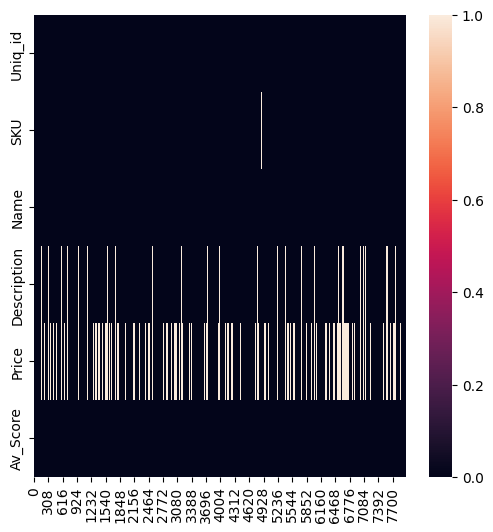

In [ ]:
# Visualising missing datasets - in `product_df`
visualise_na_in_missing_cols(product_df)

In [ ]:
# Missing datasets
reviews_df = assign_na_to_missing_cols(reviews_df)
reviews_df.isna().any()
# There are missing values in columns

Uniq_id     False
Username    False
Score       False
Review      False
dtype: bool

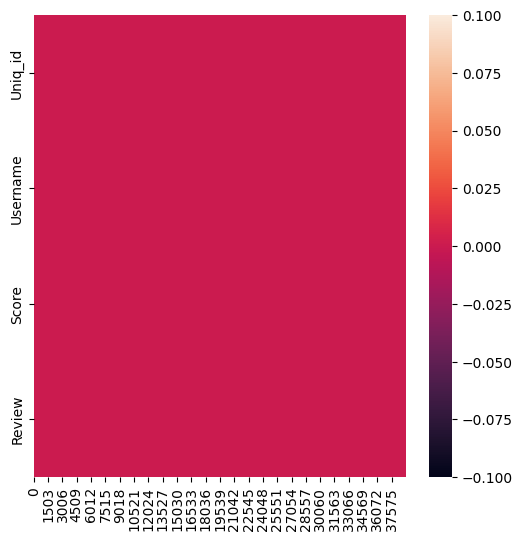

In [ ]:
# Visualising missing datasets - in `reviews_df`
visualise_na_in_missing_cols(reviews_df)

In [ ]:
# Missing datasets
users_df = assign_na_to_missing_cols(users_df)
users_df.isna().any()
# There are missing values in columns

Username    False
DOB         False
State       False
dtype: bool

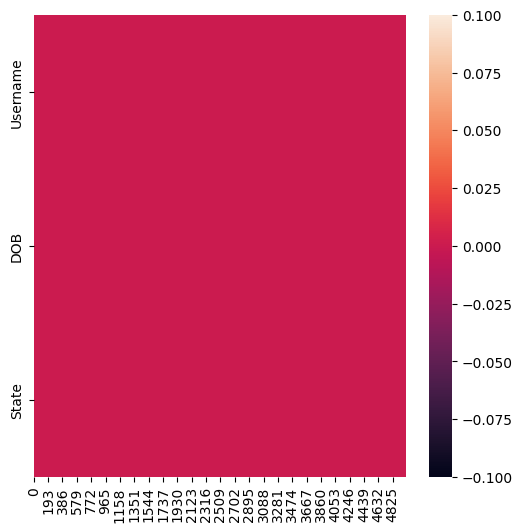

In [ ]:
# Visualising missing datasets - in `users_df`
visualise_na_in_missing_cols(users_df)

In [ ]:
# Missing datasets
df_json_products = assign_na_to_missing_cols(df_json_products)
df_json_products.isna().any()
# There are missing values in columns

uniq_id                   False
sku                        True
name_title                False
description                True
list_price                 True
sale_price                 True
category                   True
category_tree              True
average_product_rating    False
product_url               False
product_image_urls         True
brand                     False
total_number_reviews      False
Reviews                   False
Bought With               False
dtype: bool

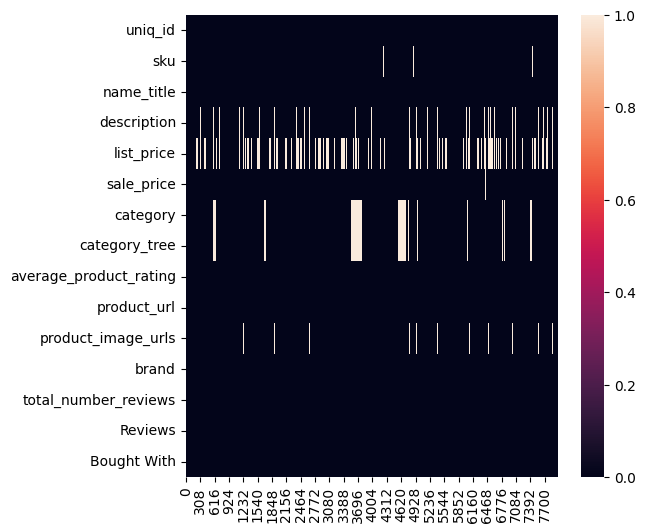

In [ ]:
# Visualise Missing columns - values
visualise_na_in_missing_cols(df_json_products)

In [ ]:
# make sure anything `missing` is actually missing
assign_na_to_missing_cols(reviews_df).isna().any()

Uniq_id     False
Username    False
Score       False
Review      False
dtype: bool

Username    0
DOB         0
State       0
Reviewed    0
dtype: int64



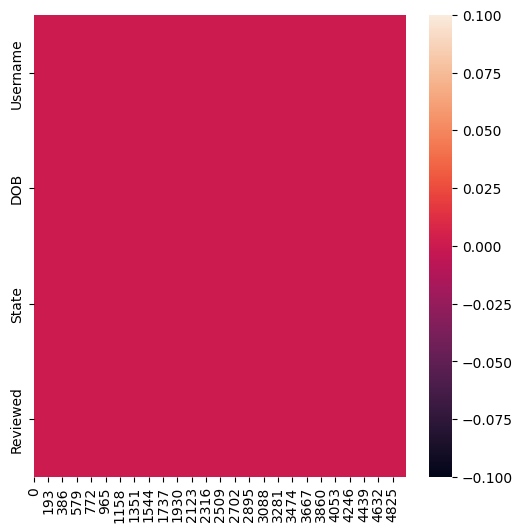

In [ ]:
# Check for missing values - reviewers_df
print(assign_na_to_missing_cols(reviewers_df).isna().sum(),end="\n\n")

# visualise missing values in datasets
visualise_na_in_missing_cols(reviewers_df)

# No missing values

In [ ]:
# columns to lower case
product_df.columns = [col.lower() for col in product_df.columns]
product_df.columns

Index(['uniq_id', 'sku', 'name', 'description', 'price', 'av_score'], dtype='object')

In [ ]:
# columns to lower case
df_json_products.column = [col.lower() for col in df_json_products.columns]

In [ ]:
df_json_products.columns = df_json_products.columns.str.lower()

In [ ]:
df_json_products.columns

Index(['uniq_id', 'sku', 'name_title', 'description', 'list_price',
       'sale_price', 'category', 'category_tree', 'average_product_rating',
       'product_url', 'product_image_urls', 'brand', 'total_number_reviews',
       'reviews', 'bought with'],
      dtype='object')

In [ ]:
# rename columns
df_json_products.rename(columns={'name_title': 'name','list_price':'price'}, inplace=True)

In [ ]:
df_json_products.columns

Index(['uniq_id', 'sku', 'name', 'description', 'price', 'sale_price',
       'category', 'category_tree', 'average_product_rating', 'product_url',
       'product_image_urls', 'brand', 'total_number_reviews', 'reviews',
       'bought with'],
      dtype='object')

In [ ]:
product_df.rename(columns={'av_score': 'average_product_rating'}, inplace=True)

In [ ]:
# Missing values in dataset - json dataset
df_json_products = assign_na_to_missing_cols(df_json_products)

df_json_products.isna().sum()

uniq_id                      0
sku                         67
name                         0
description                543
price                     2166
sale_price                  18
category                   636
category_tree              636
average_product_rating       0
product_url                  0
product_image_urls         157
brand                        0
total_number_reviews         0
reviews                      0
bought with                  0
dtype: int64

In [ ]:
# Merging product_df and df_json_products with `uniq_id` by an `inner` join
merged_products_df = pd.merge(product_df, df_json_products, on='uniq_id', how='inner')

In [ ]:
merged_products_df.shape

(7982, 20)

In [ ]:
# resolving missing values and dropping columns with suffixes
merged_products_df['sku_x'] = merged_products_df['sku_x'].fillna(merged_products_df['sku_y'])
merged_products_df['price_x'] = merged_products_df['price_x'].fillna(merged_products_df['price_y'])
merged_products_df['description_x'] = merged_products_df['description_x'].fillna(merged_products_df['description_y'])

merged_products_df.drop(['sku_y','name_y','price_y','description_y','average_product_rating_y'], axis=1, inplace=True)
merged_products_df.rename(columns={'sku_x': 'sku','name_x':'name','price_x':'price','description_x':'description','average_product_rating_x':'average_product_rating'}, inplace=True)

In [ ]:
# Missing values in dataset
merged_products_df = assign_na_to_missing_cols(merged_products_df)

merged_products_df.isna().sum()
# There are missing columns values by `value`

uniq_id                      0
sku                         67
name                         0
description                543
price                     2166
average_product_rating       0
sale_price                  18
category                   636
category_tree              636
product_url                  0
product_image_urls         157
brand                        0
total_number_reviews         0
reviews                      0
bought with                  0
dtype: int64

In [ ]:
# Examine the shape
merged_products_df.shape

(7982, 15)

In [ ]:
# Viewing reviews_df dataset
reviews_df.head()

,Uniq_id,Username,Score,Review
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,2,You never have to worry about the fit...Alfred...
1,b6c0b6bea69c722939585baeac73c13d,krpz1113,1,Good quality fabric. Perfect fit. Washed very ...
2,b6c0b6bea69c722939585baeac73c13d,mbmg3241,2,I do not normally wear pants or capris that ha...
3,b6c0b6bea69c722939585baeac73c13d,zeqg1222,0,I love these capris! They fit true to size and...
4,b6c0b6bea69c722939585baeac73c13d,nvfn3212,3,This product is very comfortable and the fabri...


In [ ]:
# Let's handle missing values in `merged_products_df`

merged_products_df.isna().any()

uniq_id                   False
sku                        True
name                      False
description                True
price                      True
average_product_rating    False
sale_price                 True
category                   True
category_tree              True
product_url               False
product_image_urls         True
brand                     False
total_number_reviews      False
reviews                   False
bought with               False
dtype: bool

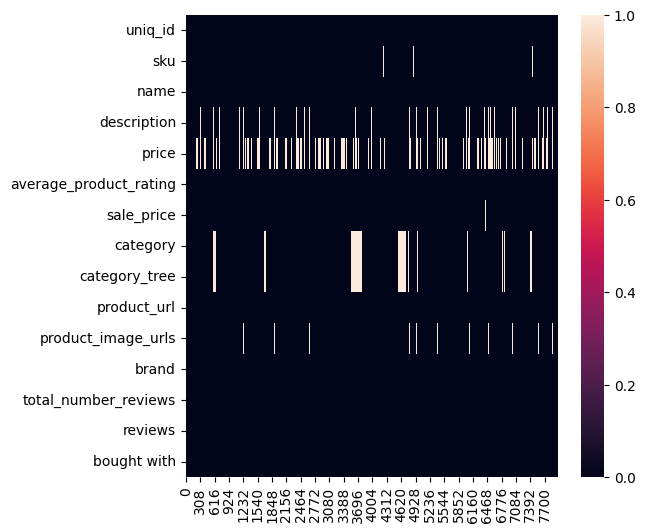

In [ ]:
# visualise missing columns - `merged_products_df`
visualise_na_in_missing_cols(merged_products_df)

In [ ]:
merged_products_df.isna().sum()

uniq_id                      0
sku                         67
name                         0
description                543
price                     2166
average_product_rating       0
sale_price                  18
category                   636
category_tree              636
product_url                  0
product_image_urls         157
brand                        0
total_number_reviews         0
reviews                      0
bought with                  0
dtype: int64

In [ ]:
# percentage missing
merged_products_df.isna().mean() * 100

uniq_id                    0.000000
sku                        0.839389
name                       0.000000
description                6.802806
price                     27.136056
average_product_rating     0.000000
sale_price                 0.225507
category                   7.967928
category_tree              7.967928
product_url                0.000000
product_image_urls         1.966926
brand                      0.000000
total_number_reviews       0.000000
reviews                    0.000000
bought with                0.000000
dtype: float64

In [ ]:
# Drop rows where 'sku' is missing
merged_products_df.dropna(subset=['sku'], inplace=True)

# For missing descriptions (6.80%), you can fill them with a placeholder text.
# Dropping these rows might lead to a significant loss of data
merged_products_df['description'].fillna('No description available', inplace=True)

# With only 1.97% missing in 'product_image_urls', lets fill these with placeholder URL or text
merged_products_df['product_image_urls'].fillna('No image available', inplace=True)

# Drop columns with `price`. it's not advisable to fill these missing values arbitrarily, with about 27.1% missing values.
# Dropping rows might be a safer choice
merged_products_df.dropna(subset=['price'], inplace=True)

# Assuming that the sale price is not drastically different from the regular price.
#  fill in the missing values with the regular 'price'

merged_products_df['sale_price'].fillna(merged_products_df['price'], inplace=True)
# Dropping rows where 'category' or 'category_tree' is missing
merged_products_df.dropna(subset=['category', 'category_tree'], inplace=True)

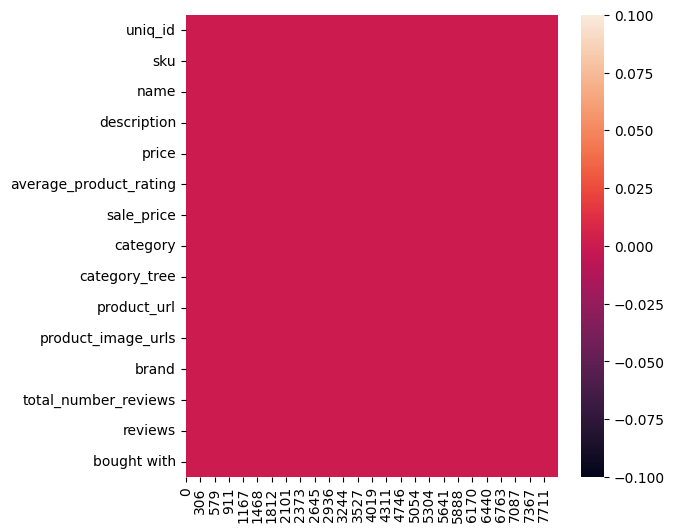

In [ ]:
# visualise missing values - `merged_products_df`
visualise_na_in_missing_cols(merged_products_df)

# No missing values in our dataset

In [ ]:
merged_products_df.shape
# datasets in products: 5,247

(5247, 15)

In [ ]:
# Lower case columns in `users_df` and `reviewers_df`
users_df.columns = users_df.columns.str.lower()
reviewers_df.columns = reviewers_df.columns.str.lower()
reviews_df.columns = reviews_df.columns.str.lower()

In [ ]:
# to csv
reviewers_df.to_csv("jcsv_reviewers.csv")
merged_products_df.to_csv("jcsv_products.csv")

In [ ]:
# imports csv
reviewers_df = pd.read_csv("/content/jcsv_reviewers.csv",index_col=0)
products_df = pd.read_csv("/content/jcsv_products.csv",index_col=0)

In [ ]:
# check for duplicates
print(reviewers_df.duplicated().any())
print(products_df.duplicated().any())
print(users_df.duplicated().any())
print(reviews_df.duplicated().any())

# No dupplicate records in our data

False
False
False
False


### Dataframe column type conversions

In [ ]:
#################################  products_df  ##########################################
# Converting price, sale_price, and average_product_rating to numeric - `products_df`
products_df['price'] = pd.to_numeric(products_df['price'], errors='coerce')
products_df['sale_price'] = pd.to_numeric(products_df['sale_price'], errors='coerce')
products_df['average_product_rating'] = pd.to_numeric(products_df['average_product_rating'], errors='coerce')

# Converting total_number_reviews to integer
products_df['total_number_reviews'] = products_df['total_number_reviews'].astype(int)

# Ensuring category and brand are of object (string) type
products_df['category'] = products_df['category'].astype(str)
products_df['brand'] = products_df['brand'].astype(str)

#################################  reviewers_df   ##########################################
# Convert 'dob' to datetime
reviewers_df['dob'] = pd.to_datetime(reviewers_df['dob'], format='%d.%m.%Y', errors='coerce')

# Ensure 'username' and 'state' are of type string
reviewers_df['username'] = reviewers_df['username'].astype(str)
reviewers_df['state'] = reviewers_df['state'].astype(str)

#################################  users_df  ##########################################
# Convert 'dob' to datetime
users_df['dob'] = pd.to_datetime(users_df['dob'], format='%d.%m.%Y', errors='coerce')

# Ensure 'username' and 'state' are of type string
users_df['username'] = users_df['username'].astype(str)
users_df['state'] = users_df['state'].astype(str)

#################################  reviews_df  ##########################################
# Ensure 'uniq_id' and 'username' are strings
reviews_df['uniq_id'] = reviews_df['uniq_id'].astype(str)
reviews_df['username'] = reviews_df['username'].astype(str)

# Convert 'score' to a numeric type, typically int or float
reviews_df['score'] = pd.to_numeric(reviews_df['score'], errors='coerce')

# Ensure 'review' is a string
reviews_df['review'] = reviews_df['review'].astype(str)

In [ ]:
# errors='coerce' parameter in pd.to_datetime() and pd.to_numeric() will convert invalid parsing into NaN
# Let's check for and handle NaN values
products_df.isna().sum()

# sale_price                2    <- NaN

uniq_id                   0
sku                       0
name                      0
description               0
price                     0
average_product_rating    0
sale_price                2
category                  0
category_tree             0
product_url               0
product_image_urls        0
brand                     0
total_number_reviews      0
reviews                   0
bought with               0
dtype: int64

In [ ]:
# Handling missing value - NaN
products_df['sale_price'] = products_df['sale_price'].fillna(products_df['sale_price'].median())

Outlier Detection

In [ ]:
def get_outliers(df: pd.DataFrame, col: str, ascending: bool = False) -> pd.DataFrame:
    """
    Identify and return the outliers in a specified column of a DataFrame.

    This function identifies outliers in a numerical column based on the Interquartile Range (IQR) method.
    Outliers are defined as values that fall below the lower bound or above the upper bound, where:
      - Lower bound = Q1 - 1.5 * IQR
      - Upper bound = Q3 + 1.5 * IQR
    Q1 is the 25th percentile, and Q3 is the 75th percentile.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    col (str): The name of the column to check for outliers.
    ascending (bool, optional): Specifies the sorting order of the returned outliers.
                                Defaults to False (descending order).

    Returns:
    pd.DataFrame: A DataFrame containing the outliers in the specified column.

    Raises:
    TypeError: If the specified column is not numerical.

    Use:
    >> get_outliers(products_df,"sale_price")
    """
    # Check if the specified column is numerical
    if not col in df.select_dtypes("number").columns.tolist():
        raise TypeError(f"{col} is not a number")

    # Calculate the 25th and 75th percentiles (Q1 and Q3)
    perc_75 = df[col].quantile(.75)
    perc_25 = df[col].quantile(.25)

    # Calculate the Interquartile Range (IQR)
    iqr = perc_75 - perc_25

    # Calculate the upper and lower bounds for outliers
    upper = perc_75 + (1.5 * iqr)
    lower = perc_25 - (1.5 * iqr)

    # Identify the outliers
    outliers = df[(df[col] < lower) | (df[col] > upper)]

    # Return the outliers sorted by the specified column
    return outliers.sort_values(col, ascending=ascending)


In [ ]:
# checking outliers in `products_df`

print(f'total outliers in sale_price : {get_outliers(products_df,"sale_price").shape[0]}',end="\n\n")

print(f'total outliers in price : {get_outliers(products_df,"price").shape[0]}',end="\n\n")

print(f'total outliers in average_product_rating : {get_outliers(products_df,"average_product_rating").shape[0]}',end="\n\n")

print(f'total outliers in total_number_reviews : {get_outliers(products_df,"total_number_reviews").shape[0]}',end="\n\n")

total outliers in sale_price : 483

total outliers in price : 554

total outliers in average_product_rating : 0

total outliers in total_number_reviews : 2



In [ ]:
# Lets examine outliers - Sale Price
sales_price_outliers = get_outliers(products_df,"sale_price")

products_df["sale_price"].describe()

# Min sales_price = 3.610000
# Max sale_price = 10273.300000

count     5247.000000
mean        77.216355
std        288.700630
min          3.610000
25%         21.740000
50%         32.620000
75%         54.380000
max      10273.300000
Name: sale_price, dtype: float64

In [ ]:
products_df[products_df["sale_price"] == 3.610000]

,uniq_id,sku,name,description,price,average_product_rating,sale_price,category,category_tree,product_url,product_image_urls,brand,total_number_reviews,reviews,bought with
1376,8fcce308a7ad6625dad781b694c63ebd,pp5006480614,Ambrielle® Bonded Hipster Panties,Start your day seamlessly in our bonded hipste...,10.88,2.0,3.61,clearance,jcpenney|clearance,http://www.jcpenney.com/ambrielle-bonded-hipst...,http://s7d2.scene7.com/is/image/JCPenney/DP051...,Ambrielle,1,"[{'User': 'hlgw1123', 'Review': 'Love the way ...","['9e7508e662199af887917b5aded63145', '94669197..."


In [ ]:
products_df[products_df["sale_price"] == 10273.300000]

,uniq_id,sku,name,description,price,average_product_rating,sale_price,category,category_tree,product_url,product_image_urls,brand,total_number_reviews,reviews,bought with
5855,05b9dc920937585999bfcea3ab321bdd,pp5003910938,1½ CT. Round Certified Diamond Solitaire 14K Y...,"Elegant in its simplicity, this lovely ring pr...",17122.17,3.0,10273.3,solitaire rings,jcpenney|jewelry-watches|solitaire rings,http://www.jcpenney.com/1-ct-round-certified-d...,http://s7d9.scene7.com/is/image/JCPenney/DP052...,MODERN BRIDE,1,"[{'User': 'hqrd3431', 'Review': 'Too much jewe...","['de1cdc933d0ff353fa34ea54997ec5ff', 'd5a9f394..."


In [ ]:
# We can see the price and sale_prices with extreme values are items of high value.
# In our dataset we see - 1½ CT. Round Certified Diamond is very expensive
# While less expensive items are of low value - Hipster Panties
# This outliers in sale_prices should be left in our dataset for further analysis.

In [ ]:
# Lets examine outliers - total_number_reviews
total_n_reviews_outliers = get_outliers(products_df,"total_number_reviews")

In [ ]:
total_n_reviews_outliers

# Brands - liz claiborne seems popular with much reviews, lets leave the outliers for further analysis

,uniq_id,sku,name,description,price,average_product_rating,sale_price,category,category_tree,product_url,product_image_urls,brand,total_number_reviews,reviews,bought with
1186,2ce274384d293748bbf8bdebbc0aa145,pp5006200106,Liz Claiborne® Bermuda Shorts,"Whatever your weekend outing, youll be perfect...",45.93,2.826087,26.58,bermuda,jcpenney|bermuda,http://www.jcpenney.com/liz-claiborne-bermuda-...,http://s7d2.scene7.com/is/image/JCPenney/DP091...,LIZ CLAIBORNE,23,"[{'User': 'cjcm1343', 'Review': 'I checked at ...","['8dc64f56e6d867b484c21297a41021ae', 'c7030165..."
6561,6c40fb8c09f9b94ef12003656c808cf1,pp5006200106,Liz Claiborne® Bermuda Shorts,"Whatever your weekend outing, youll be perfect...",44.93,2.826087,26.00,shorts,jcpenney|shorts,http://www.jcpenney.com/liz-claiborne-bermuda-...,http://s7d2.scene7.com/is/image/JCPenney/DP091...,LIZ CLAIBORNE,23,"[{'User': 'nkjk3242', 'Review': 'I checked at ...","['42a42f9ba2d25a114a9626f04692c470', 'b5d609e0..."


In [ ]:
# lowercase categorical values for columns.
def get_or_lowercase_categorical_columns(*,df: pd.DataFrame,inplace:bool = False) -> pd.DataFrame:
    """
    Retrieve or get values in categorical columns of a DataFrame to lowercase

    This function identifies all categorical columns in the DataFrame (i.e., columns
    with data type 'object' or 'category') and converts their values to lowercase.

    Parameters:
    df (pd.DataFrame): The DataFrame whose categorical column values need to be lowercased.

    Returns:
    pd.DataFrame: The DataFrame with lowercase values in categorical columns.
    """
    # Identify categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    if not inplace:
      return categorical_columns

    # Lowercase values in categorical columns
    df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.lower())

    return df

### Datasets and columns(features) description

1. `users_df`
* username: The unique identifier or name used by a user on the platform.
* dob (Date of Birth): The birth date of the user
* state: The geographical state where the user resides.

~ dataset : `users.csv`


2. `reviewers_df`
* username: The unique identifier or name of the reviewer.
* dob: Date of Birth of the reviewer.
* state: The state where the reviewer is located.
* reviewed: A list of item identifiers that the user has reviewed.

~ dataset : `jcsv_reviewers.csv`


3. `reviews_df`
* uniq_id: A unique identifier for a product or item.
* username: The identifier for the user who wrote the review.
* score: A numerical rating given to the product by the user.
* review: The textual content of the user's review for the product.

~ dataset : `reviews.csv`


4. `products_df`
* uniq_id: A unique identifier for each product listed.
* sku: Stock Keeping Unit, another unique identifier for products
* name: The name of the product.
* description: A description of the product.
* price: The regular price of the product.
* average_product_rating: The average rating of the product across all reviews.
* sale_price: The sale or discounted price of the product.
* category: The category or type of the product.
* category_tree: A hierarchical categorization of the product.
* product_url: The URL to the product's webpage.
* product_image_urls: URLs to images of the product in a webpage.
* brand: The brand or manufacturer of the product.
* total_number_reviews: The total number of reviews that the product has received.
* reviews: A list of reviews for the product.
* bought with: A list of other products (likely identified by their uniq_ids) frequently bought together with this product.

~ dataset : `jcsv_products.csv`

## 3. Data Visualisation and Descriptive Analysis

### Dataframe - `products_df`

In [ ]:
# descriptive statistics of dataframe variables.
stats_info = products_df.describe()
stats_info.loc['skew'] = products_df.skew()
stats_info.loc['kurtosis'] = products_df.kurt()
stats_info.T

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
price,5247.0,132.006882,487.549670,8.01,40.70,58.01,85.13,17122.17,17.757007,462.652506
average_product_rating,5247.0,2.986040,0.933917,1.00,2.50,3.00,3.50,5.00,-0.012907,0.099950
sale_price,5247.0,77.216355,288.700630,3.61,21.74,32.62,54.38,10273.30,17.776887,472.450638
total_number_reviews,5247.0,4.601677,3.192320,1.00,1.00,4.00,8.00,23.00,0.331911,-0.962601


### Univariate Analysis on Numerical Variables.

columns of interest for univariate analysis are;
numerical : `price`, `sale_price`, `average_product_rating` and `total_number_reviews`

categorical : `category`, `brand`, and `sku`

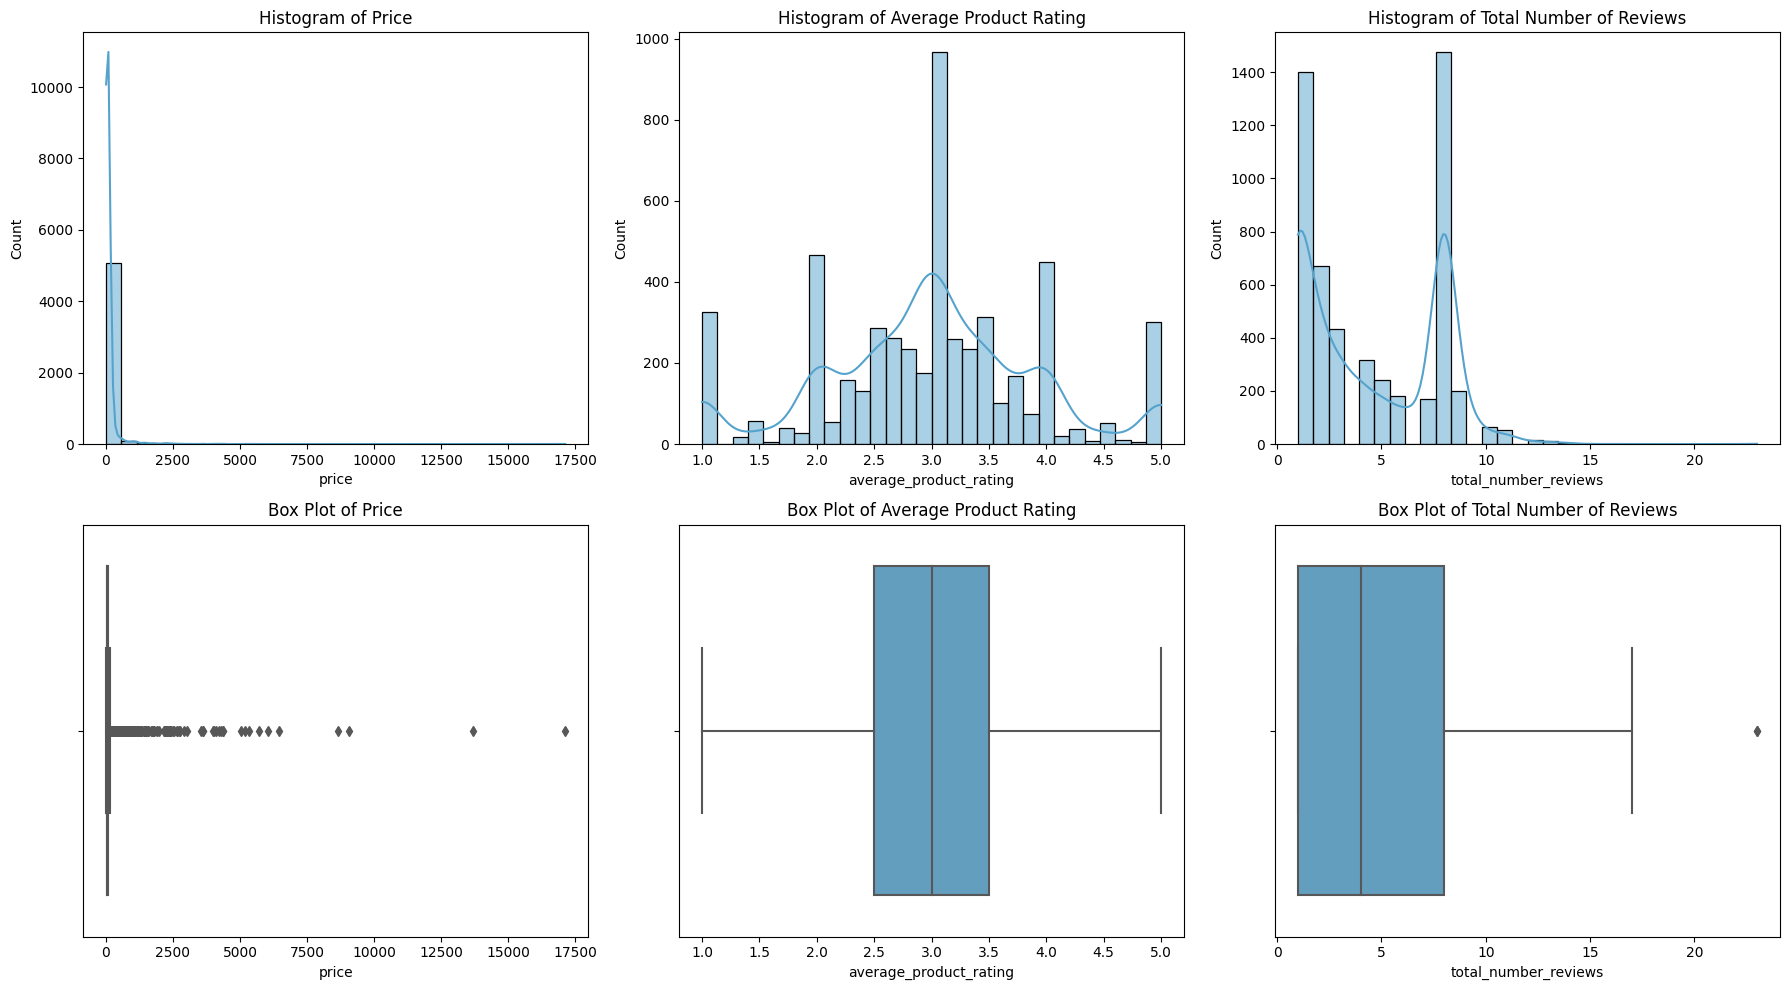

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))


# Histograms
sns.histplot(products_df['price'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Histogram of Price')

sns.histplot(products_df['average_product_rating'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Histogram of Average Product Rating')

sns.histplot(products_df['total_number_reviews'], bins=30, ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Histogram of Total Number of Reviews')

# Boxplots
sns.boxplot(x=products_df['price'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Price')

sns.boxplot(x=products_df['average_product_rating'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Average Product Rating')

sns.boxplot(x=products_df['total_number_reviews'], ax=axes[1, 2])
axes[1, 2].set_title('Box Plot of Total Number of Reviews')

plt.tight_layout()
plt.show()

In [ ]:
# discount percentage
products_df['discount_percentage'] = 100 * ((products_df['price'] - products_df['sale_price']) / products_df['price'])

In [ ]:
products_df['discount_percentage'].describe().T

count    5247.000000
mean       41.700656
std        14.858392
min         0.000000
25%        32.036536
50%        41.685052
75%        50.027579
max        87.514536
Name: discount_percentage, dtype: float64

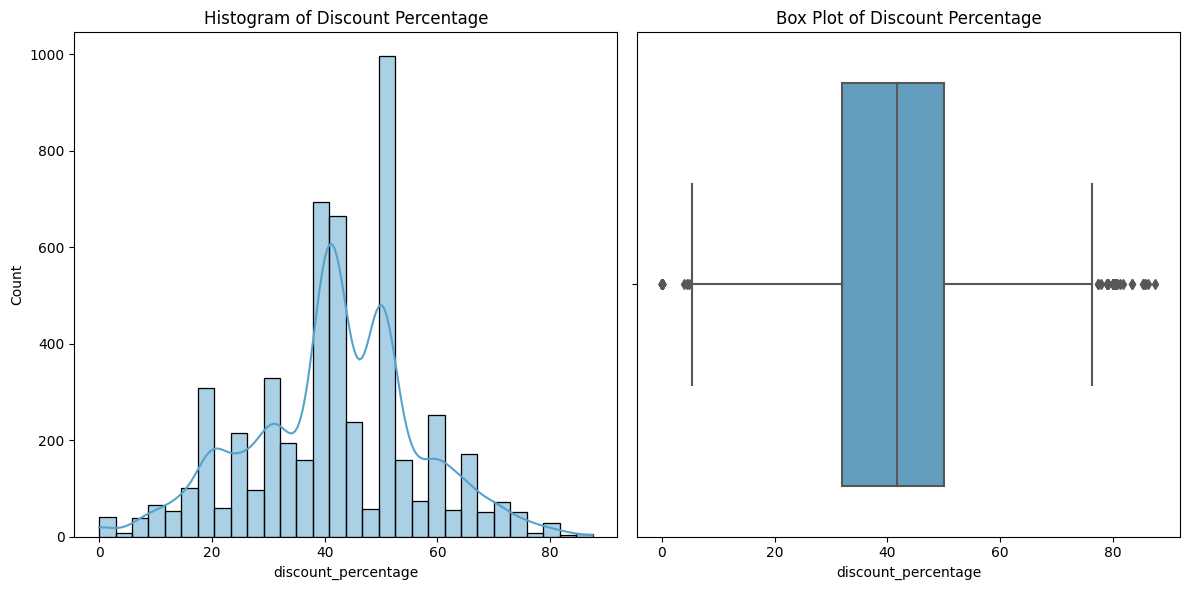

In [ ]:
# Univariate analysis of 'discount_percentage'

# Plotting histogram and box plot for 'discount_percentage'
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
sns.histplot(products_df['discount_percentage'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Histogram of Discount Percentage')

# Boxplot
sns.boxplot(x=products_df['discount_percentage'], ax=axes[1])
axes[1].set_title('Box Plot of Discount Percentage')

plt.tight_layout()
plt.show()


### 1. Price:

* The histogram shows a highly right-skewed distribution, indicating most products have a lower price, with a few expensive outliers.
* The box plot confirms this skewness, with numerous outliers on the higher end of the price range.
### 2. Average Product Rating:

* The distribution is somewhat uniform with slight peaks around whole and half numbers (like 3.0, 3.5, etc.). This pattern is typical for rating data.
* The box plot doesn't show significant outliers, suggesting a relatively even spread of ratings across products.
### 3. Total Number of Reviews:

* This variable also shows a right-skewed distribution, indicating that most products have a small number of reviews, with a few products having significantly more.
* The box plot again shows the presence of outliers with a higher number of reviews.

### 4. discount_percentage
* The distribution appears to be somewhat uniform with several peaks. This suggests that certain discount levels (like around 40% or 50%) are more common than others.
* The presence of a Kernel Density Estimate (KDE) curve indicates the probability density of different discount percentages.
* The box plot shows the quartiles of the discount data. The median is near the 40% mark, consistent with the histogram.
* There are outliers on both the lower and higher ends, indicating some products have significantly lower or higher discounts than the majority.

Categorical columns of `products_df`

Number of unique category : 933

Number of unique SKUs: 4032

Number of unique brand : 523




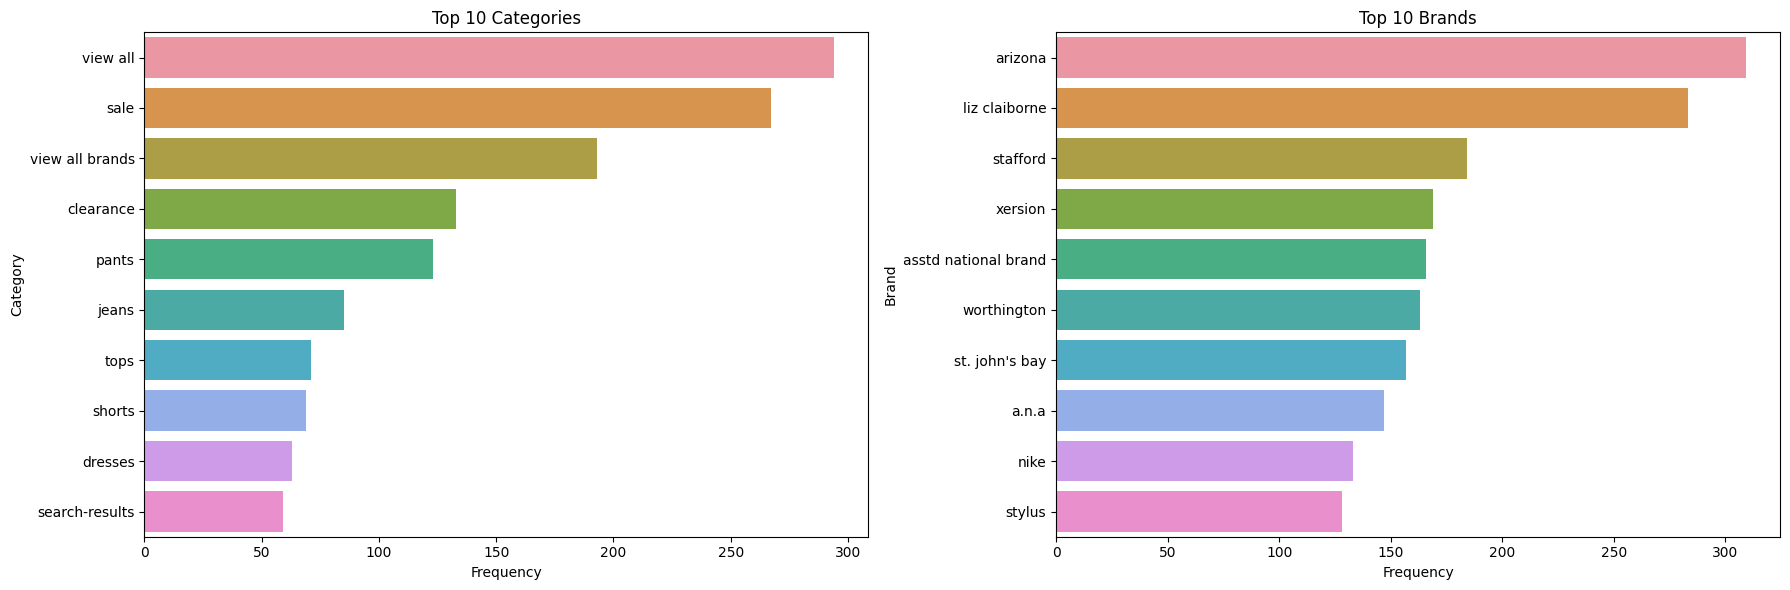

In [ ]:
# Count of unique values for 'category' and 'brand'
category_counts = products_df['category'].value_counts().head(10) # Top 10 categories
brand_counts = products_df['brand'].value_counts().head(10) # Top 10 brands

print(f"Number of unique category : {products_df['category'].nunique()}",end="\n\n")
num_unique_skus = products_df['sku'].nunique()
print(f"Number of unique SKUs: {num_unique_skus}",end="\n\n")
print(f"Number of unique brand : {products_df['brand'].nunique()}",end="\n\n\n")

# Plotting the counts
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Category counts
sns.barplot(x=category_counts, y=category_counts.index, ax=axes[0])

axes[0].set_title('Top 10 Categories')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Category')

# Brand counts
sns.barplot(x=brand_counts, y=brand_counts.index, ax=axes[1])
axes[1].set_title('Top 10 Brands')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Brand')

plt.tight_layout()
plt.show()

### 1. Top 10 Categories:

The bar chart shows the frequency of the top 10 categories in the dataset. The most frequent categories are at the top of the chart.
This visualization helps identify which categories are more common in the dataset.
### 2. Top 10 Brands:

Similarly, the bar chart for brands displays the top 10 brands by frequency.
This chart is useful to understand which brands are most represented in the dataset.
### 3. Unique SKUs:

There are 4032 unique SKUs (Stock Keeping Units) in the dataset.
This high number of unique SKUs indicates a wide variety of individual products.

[Text(0.5, 1.0, 'Spearman correlation of Features')]

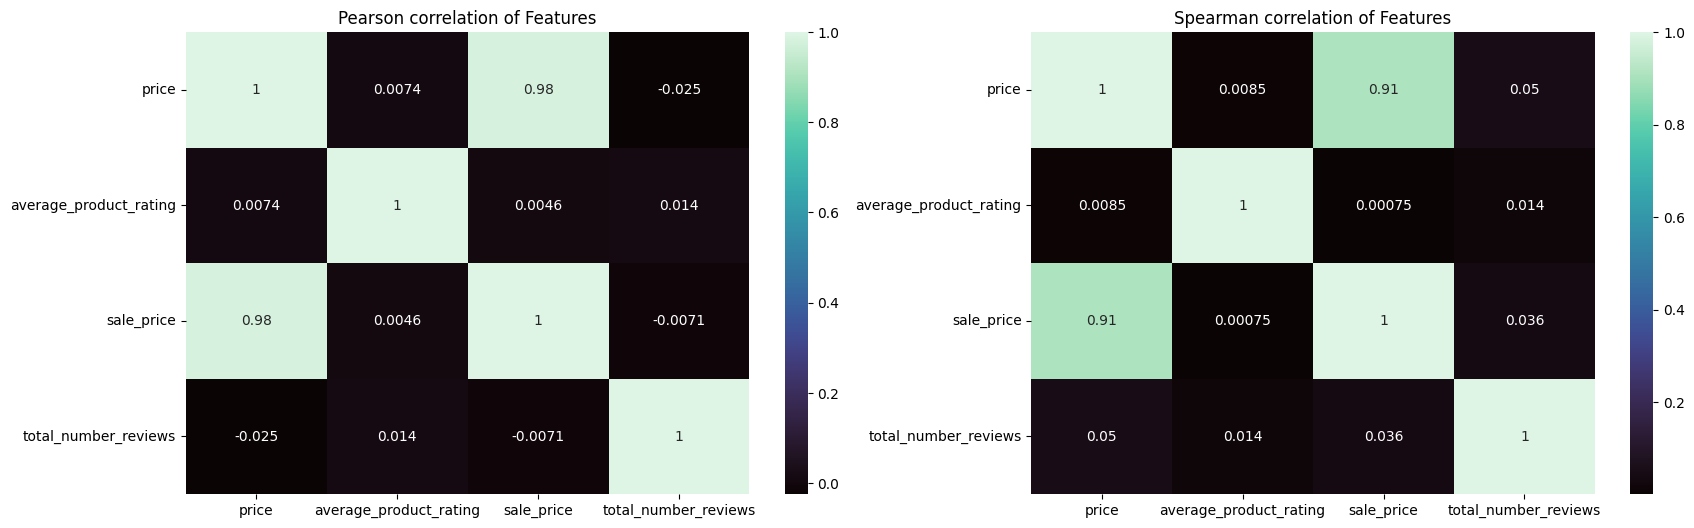

In [ ]:
# Calculate and visualise correlation matrix

products_df_exc =  products_df[['price', 'average_product_rating','sale_price','total_number_reviews']]

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.heatmap(products_df_exc.corr('pearson'),
            annot=True,cmap = 'mako').set(title="Pearson correlation of Features")

plt.subplot(1, 2, 2)
sns.heatmap(products_df_exc.corr('spearman'),
            annot=True,cmap = 'mako').set(title="Spearman correlation of Features")

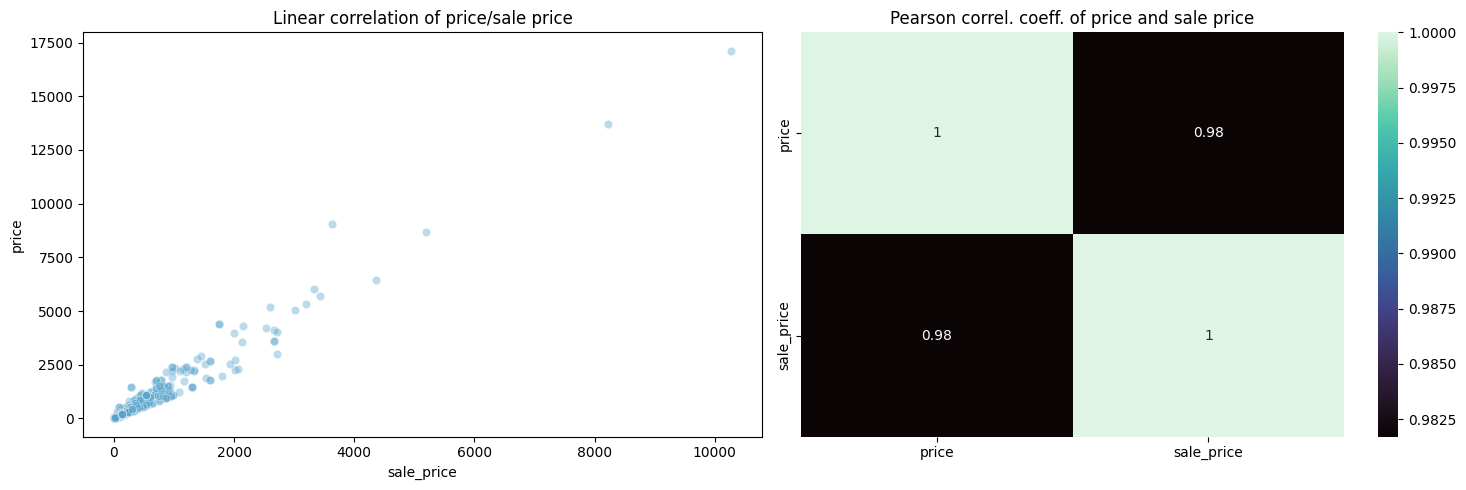

In [ ]:
df_cols = products_df[["price","sale_price"]]

# lets visualise on a scatterplot.
fig, axs = plt.subplots(1,2, figsize=[15,5])
sns.scatterplot(data = df_cols,
                x = "sale_price",
                y = "price",
                ax=axs[0],
                alpha=0.4).set(title="Linear correlation of price/sale price",
                               xlabel="sale_price",
                               ylabel="price")

# lets visualise pearsons coerr. coeff.
sns.heatmap(df_cols.corr("pearson"),
            ax=axs[1],
            annot=True,cmap = 'mako').set(title="Pearson correl. coeff. of price and sale price")
fig.tight_layout()

# A correlation of 0.98 between price and sale price suggests a strong positive relationship,
# indicating that as the price of a product increases, its sale price tends to increase nearly in tandem

### Dataframe - `users_df`,`reviewers_df`,`reviews_df`

In [ ]:
users_df.head()

,username,dob,state
0,bkpn1412,1983-07-31,Oregon
1,gqjs4414,1998-07-27,Massachusetts
2,eehe1434,1950-08-08,Idaho
3,hkxj1334,1969-08-03,Florida
4,jjbd1412,2001-07-26,Georgia


In [ ]:
reviewers_df.head()

,username,dob,state,reviewed
0,bkpn1412,1983-07-31,oregon,['cea76118f6a9110a893de2b7654319c0']
1,gqjs4414,1998-07-27,massachusetts,['fa04fe6c0dd5189f54fe600838da43d3']
2,eehe1434,1950-08-08,idaho,[]
3,hkxj1334,1969-08-03,florida,"['f129b1803f447c2b1ce43508fb822810', '3b0c9bc0..."
4,jjbd1412,2001-07-26,georgia,[]


In [ ]:
reviews_df.head()

,uniq_id,username,score,review
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,2,you never have to worry about the fit...alfred...
1,b6c0b6bea69c722939585baeac73c13d,krpz1113,1,good quality fabric. perfect fit. washed very ...
2,b6c0b6bea69c722939585baeac73c13d,mbmg3241,2,i do not normally wear pants or capris that ha...
3,b6c0b6bea69c722939585baeac73c13d,zeqg1222,0,i love these capris! they fit true to size and...
4,b6c0b6bea69c722939585baeac73c13d,nvfn3212,3,this product is very comfortable and the fabri...


In [ ]:
# Merge users_df and reviewers_df by `inner` join.
users_reviewers_merged_df = pd.merge(users_df, reviewers_df, on='username', how='inner')

In [ ]:
# merge again with reviews_df
users_r_reviewers_merged_df = pd.merge(reviews_df,users_reviewers_merged_df, on='username', how='inner')

In [ ]:
users_r_reviewers_merged_df = users_r_reviewers_merged_df.drop(columns=["dob_x","state_x"],axis=1)

In [ ]:
users_r_reviewers_merged_df.rename(columns={"dob_y":"dob","state_y":"state"},inplace=True)

In [ ]:
users_r_reviewers_merged_df.head()

,uniq_id,username,score,review,dob,state,reviewed
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,2,you never have to worry about the fit...alfred...,1980-07-31,american samoa,"['0144d2094668b42ae7c674915806f5f3', '7c27ffd8..."
1,cbe8d131628ec67e803c47d3dd6f2529,fsdv4141,2,"these are great shirts, looks great all day. w...",1980-07-31,american samoa,"['0144d2094668b42ae7c674915806f5f3', '7c27ffd8..."
2,5ea5f53bbb750106865a044634404dd7,fsdv4141,5,i purchase three rugs to replace twenty-year-o...,1980-07-31,american samoa,"['0144d2094668b42ae7c674915806f5f3', '7c27ffd8..."
3,0144d2094668b42ae7c674915806f5f3,fsdv4141,1,i am a huge user of be original fromula. i hap...,1980-07-31,american samoa,"['0144d2094668b42ae7c674915806f5f3', '7c27ffd8..."
4,99141a2b164cf257c96bcb4593915b50,fsdv4141,1,very soft and stretchy! they arent as dressy a...,1980-07-31,american samoa,"['0144d2094668b42ae7c674915806f5f3', '7c27ffd8..."


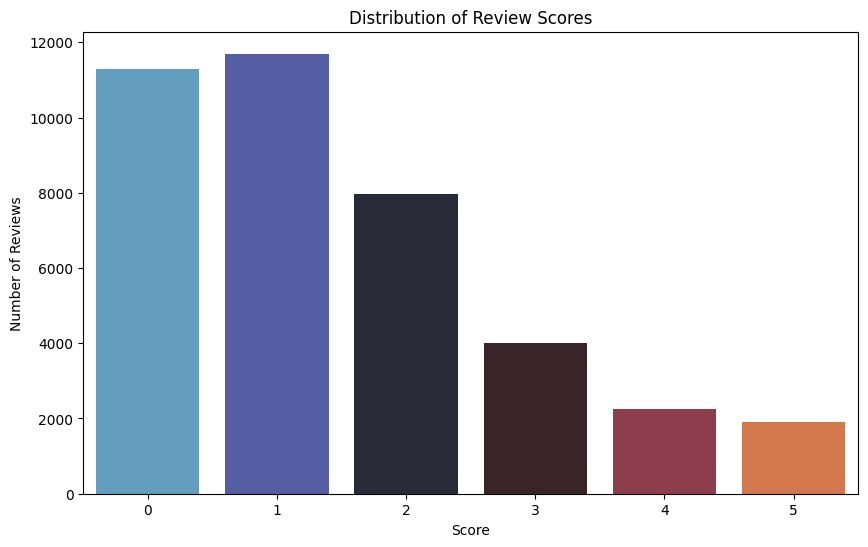



0 star reviews : 11280
1 star reviews : 11696
2 star reviews : 7969
3 star reviews : 4013
4 star reviews : 2251
5 star reviews : 1905


In [ ]:
score_distribution = users_r_reviewers_merged_df['score'].value_counts().sort_index()

# Plotting the distribution of scores
plt.figure(figsize=(10, 6))
sns.barplot(x=score_distribution.index, y=score_distribution.values)
plt.title('Distribution of Review Scores')
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.show()

print(end="\n\n")

for star, review_ in list(enumerate(score_distribution)):
  print(f"{star} star reviews : {review_}")

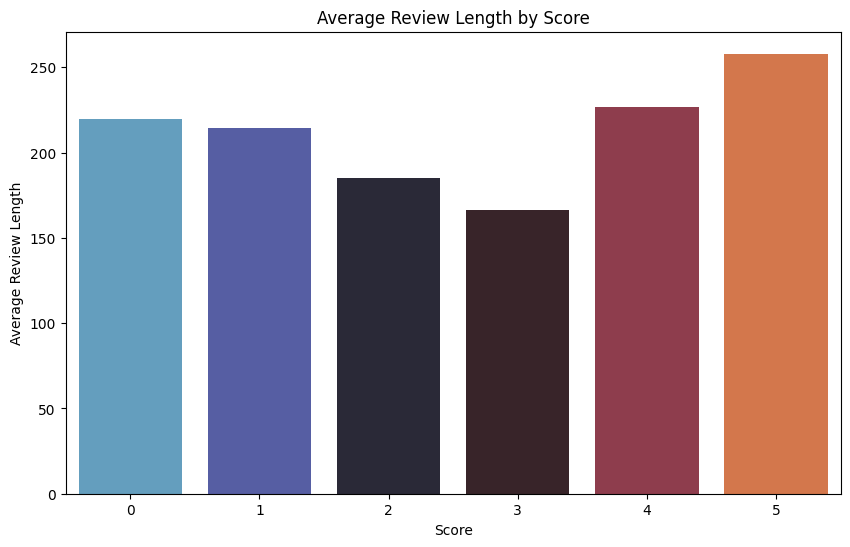

score
0    219.815248
1    214.327291
2    184.875769
3    166.502616
4    226.503332
5    257.947507
Name: review_length, dtype: float64

In [ ]:
# Analysis 2: Review Length Analysis

# Calculate the length of each review
users_r_reviewers_merged_df['review_length'] = users_r_reviewers_merged_df['review'].apply(lambda x: len(str(x)))

# Group by score and calculate the average length of reviews for each score
avg_review_length_by_score = users_r_reviewers_merged_df.groupby('score')['review_length'].mean()

# Plotting the average review length by score
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_review_length_by_score.index, y=avg_review_length_by_score.values)
plt.title('Average Review Length by Score')
plt.xlabel('Score')
plt.ylabel('Average Review Length')
plt.show()

avg_review_length_by_score

In [ ]:
users_r_reviewers_merged_df.head()

,uniq_id,username,score,review,dob,state,reviewed,review_length
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,2,you never have to worry about the fit...alfred...,1980-07-31,american samoa,"['0144d2094668b42ae7c674915806f5f3', '7c27ffd8...",132
1,cbe8d131628ec67e803c47d3dd6f2529,fsdv4141,2,"these are great shirts, looks great all day. w...",1980-07-31,american samoa,"['0144d2094668b42ae7c674915806f5f3', '7c27ffd8...",57
2,5ea5f53bbb750106865a044634404dd7,fsdv4141,5,i purchase three rugs to replace twenty-year-o...,1980-07-31,american samoa,"['0144d2094668b42ae7c674915806f5f3', '7c27ffd8...",269
3,0144d2094668b42ae7c674915806f5f3,fsdv4141,1,i am a huge user of be original fromula. i hap...,1980-07-31,american samoa,"['0144d2094668b42ae7c674915806f5f3', '7c27ffd8...",1275
4,99141a2b164cf257c96bcb4593915b50,fsdv4141,1,very soft and stretchy! they arent as dressy a...,1980-07-31,american samoa,"['0144d2094668b42ae7c674915806f5f3', '7c27ffd8...",117


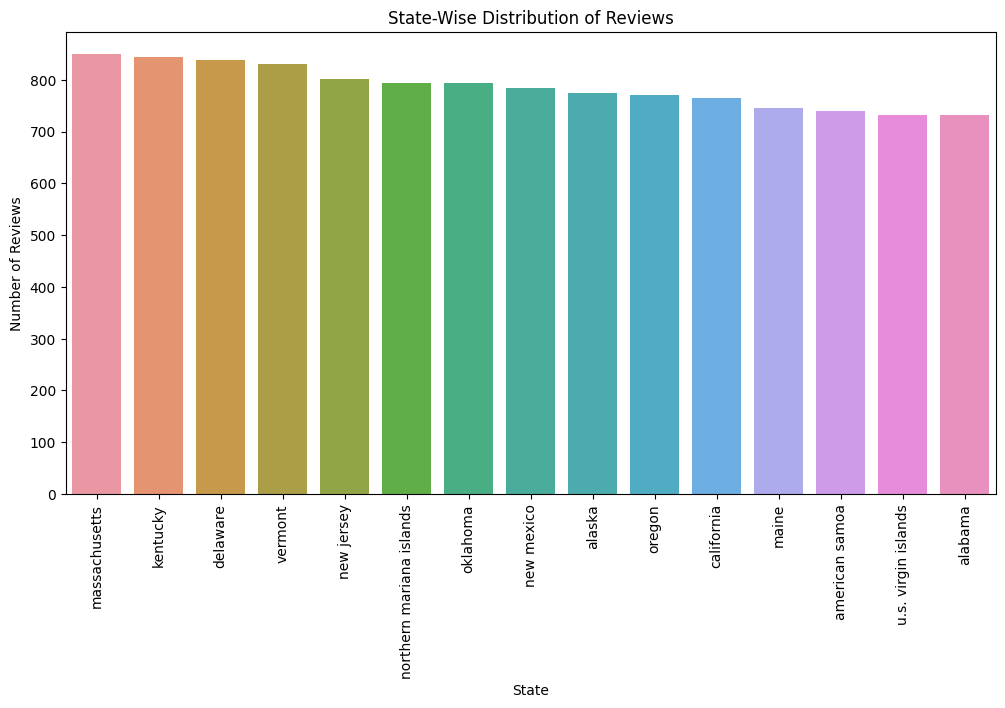

In [ ]:
# Analysis: State-Wise Distribution of Reviews

# Counting the number of reviews by top 15 state
state_wise_reviews = users_r_reviewers_merged_df['state'].value_counts()

# Plotting the distribution of reviews by state
plt.figure(figsize=(12, 6))
sns.barplot(x=state_wise_reviews.nlargest(15).index, y=state_wise_reviews.nlargest(15).values)
plt.title('State-Wise Distribution of Reviews')
plt.xlabel('State')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()

### Insights:
The dataset shows a diverse geographical distribution of reviewers, with Massachusetts leading in the number of reviews. There is a relatively even distribution among the top states, indicating active participation from various regions.

In [ ]:
import ast
# Converting the string representation of lists into actual lists
users_r_reviewers_merged_df['reviewed_list'] = users_r_reviewers_merged_df['reviewed'].apply(ast.literal_eval)

# Counting the number of products reviewed by each user
users_r_reviewers_merged_df['num_products_reviewed'] = users_r_reviewers_merged_df['reviewed_list'].apply(len)

# Aggregating the number of products reviewed by each user
user_product_review_counts = users_r_reviewers_merged_df.groupby('username')['num_products_reviewed'].sum().sort_values(ascending=False)

# Counting how many times each product is reviewed across all users
product_review_counts = pd.Series([item for sublist in users_r_reviewers_merged_df['reviewed_list'] for item in sublist]).value_counts()

# Top 10 users by number of products reviewed and top 10 most reviewed products
top_10_users_by_reviews = user_product_review_counts.nlargest(10)
top_10_most_reviewed_products = product_review_counts.nlargest(10)

top_10_users_by_reviews, top_10_most_reviewed_products


(username
 igqu1322    126
 jyqm4141    112
 zhfr1233    112
 kujq4222    102
 fuss4231     98
 gaeq2421     96
 mrvn2422     95
 ipff3233     90
 lmue4442     90
 bzgw3443     90
 Name: num_products_reviewed, dtype: int64,
 5f280fb338485cfc30678998a42f0a55    34
 571b86d307f94e9e8d7919b551c6bb52    34
 63706f48c97d057a285863a7f7aeabc4    20
 903f4a1e82f85c83e5cc73f6166307cc    20
 18956133ab0890d09d6f48c8de8d7edf    20
 b1980a8d532512bb2d2592d768603a4d    20
 12fce24391172cdb572a8cd4f30a7cbc    19
 90acaa9da3a0b55897accddde0c7279d    19
 7bd78c34a58725f0792e43ca3a6a5023    19
 5128ac798748ae8bb567ce327c685a33    19
 dtype: int64)

## Insights :
### Top 10 Users by Number of Products Reviewed.

 * igqu1322   has *reviewed* 126  *products*
 * jyqm4141    has *reviewed* 112  *products*
 * zhfr1233   has  *reviewed* 112  *products*
 * kujq4222    has *reviewed* 102  *products*
 * fuss4231    has *reviewed* 98   *products*
 * gaeq2421    has *reviewed* 96   *products*
 * mrvn2422    has *reviewed* 95   *products*
 * ipff3233    has *reviewed* 90   *products*
 * lmue4442    has *reviewed* 90   *products*
 * bzgw3443    has *reviewed* 90   *products*


 ### Top 10 Most Reviewed Products.
* product `uniq_id` '5f280fb338485cfc30678998a42f0a55' was Reviewed 34 times
* product `uniq_id` '571b86d307f94e9e8d7919b551c6bb52' was Reviewed 34 times
* product `uniq_id` '63706f48c97d057a285863a7f7aeabc4' was Reviewed 20 times
* product `uniq_id` '903f4a1e82f85c83e5cc73f6166307cc' was Reviewed 20 times
* product `uniq_id` '18956133ab0890d09d6f48c8de8d7edf' was Reviewed 20 times
* product `uniq_id` 'b1980a8d532512bb2d2592d768603a4d' was Reviewed 20 times
* product `uniq_id` '12fce24391172cdb572a8cd4f30a7cbc' was Reviewed 19 times
* product `uniq_id` '90acaa9da3a0b55897accddde0c7279d' was Reviewed 19 times
* product `uniq_id` '7bd78c34a58725f0792e43ca3a6a5023' was Reviewed 19 times
* product `uniq_id` '5128ac798748ae8bb567ce327c685a33' was Reviewed 19 times


### Summary :
- The dataset has a range of user engagement levels, with some users reviewing a large number of different products.
- Certain products are reviewed more frequently than others, indicating their popularity

### Sentiment Analysis on Review text

In [ ]:
# Sentiment Analysis Function.
from enum import Enum
from textblob import TextBlob

class SentimentType(Enum):
    POSITIVE = "positive"
    NEUTRAL = "neutral"
    NEGATIVE = "negative"

def classify_sentiment_textblob(text):
    """
    Classify the sentiment of a given text as positive, neutral, or negative.

    This function uses TextBlob to analyze the sentiment of the input text.
    TextBlob provides a simple API for diving into common natural language processing (NLP) tasks.
    It assigns a polarity score to the text, where the score is a float within the range [-1.0, 1.0].
    The polarity score indicates the sentiment of the text:
        - Positive sentiment: polarity score > 0
        - Neutral sentiment: polarity score = 0
        - Negative sentiment: polarity score < 0

    Parameters:
    text (str): The text string whose sentiment needs to be classified.

    Returns:
    str: The sentiment classification of the text, which can be 'positive', 'neutral', or 'negative'.
    """
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return SentimentType.POSITIVE.value
    elif analysis.sentiment.polarity == 0:
        return SentimentType.NEUTRAL.value
    else:
        return SentimentType.NEGATIVE.value


In [ ]:
# Sentiment Analysis for entire reviews.

data = users_r_reviewers_merged_df.copy()

data['sentiment_class'] = data['review'].apply(lambda x: classify_sentiment_textblob(str(x)))

sentiment_summary_ = data['sentiment_class'].value_counts()

# Calculating percentage distribution of sentiments
sentiment_percentage_ = round(sentiment_summary_ / sentiment_summary_.sum() * 100,2)

print(f"Sentiment Summary (by Sum) : {sentiment_summary_}",end="\n\n")
print(f"Sentiment Summary (by Percentage) : {sentiment_percentage_}",end="\n\n")

Sentiment Summary (by Sum) : positive    35240
negative     2678
neutral      1196
Name: sentiment_class, dtype: int64

Sentiment Summary (by Percentage) : positive    90.10
negative     6.85
neutral      3.06
Name: sentiment_class, dtype: float64



### Insights :  
* Positive Reviews: 35,240 (90.10%)
* Negative Reviews: 2,678 (6.85%)
* Neutral Reviews: 1,196 (3.06%)

 A significant majority of the reviews in the dataset are classified as positive, indicating that most reviewers express a positive sentiment in their reviews. Negative and neutral reviews constitute a smaller proportion of the dataset

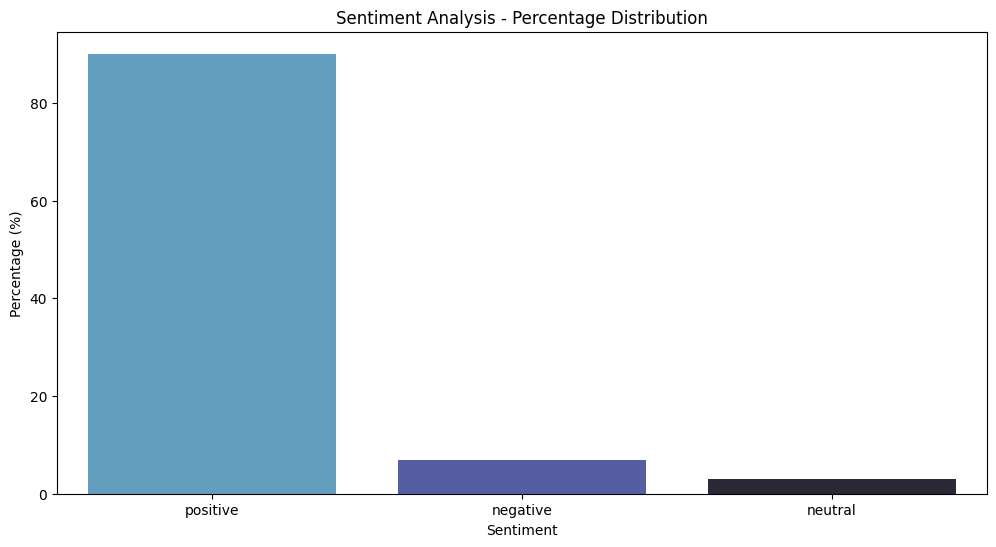

In [ ]:
# Visualise Sentiment Analysis on reviews

plt.figure(figsize=(12, 6))
sns.barplot(x=sentiment_percentage_.index, y=sentiment_percentage_.values)
plt.title('Sentiment Analysis - Percentage Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage (%)')
plt.show()

In [ ]:
# Sentiment Analysis by `uniq_id`

data = users_r_reviewers_merged_df.copy()

# Analyzing sentiment of each review
data['sentiment_class_textblob'] = data['review'].apply(lambda x: classify_sentiment_textblob(str(x)))

# Grouping the data by product ID
sentiment_by_product = data.groupby('uniq_id')['sentiment_class_textblob'].value_counts().unstack().fillna(0)

# Adding a column to identify the predominant sentiment for each product
sentiment_by_product['predominant_sentiment'] = sentiment_by_product.idxmax(axis=1)

# Summary of predominant sentiments for products
predominant_sentiment_summary = sentiment_by_product['predominant_sentiment'].value_counts()

# Displaying the summary and a few examples of products with their sentiment counts
print(f"Sentiment Summary {predominant_sentiment_summary}")

Sentiment Summary positive    7582
negative     288
neutral      112
Name: predominant_sentiment, dtype: int64


In [ ]:
# view top 20 sentiments analysis on product `uniq_id`
sentiment_by_product.head(20).sort_values(by=["positive"],ascending=False)

sentiment_class_textblob,negative,neutral,positive,predominant_sentiment
uniq_id,,,,
000db764b3c4f52badbe24ce4c79bb31,0.0,0.0,9.0,positive
000bde718ab945188a364aab4d8bcfaa,0.0,0.0,8.0,positive
002accd6fafae977acc923604567454b,1.0,0.0,8.0,positive
007aec4d2ee576db8a9c94ef3ed23295,1.0,0.0,7.0,positive
0025a4a58b31507686f9adc3232bb57f,1.0,2.0,7.0,positive
006d60d49b77f2a3766a993b7f73882d,1.0,0.0,6.0,positive
00722e0f6cafe0d26ca37c501f888731,1.0,0.0,4.0,positive
0017caf0fa3f54f4e9cf99f9238d3a16,0.0,0.0,4.0,positive
001e2c9d52cd6a78d545ba97453b3df7,0.0,0.0,3.0,positive


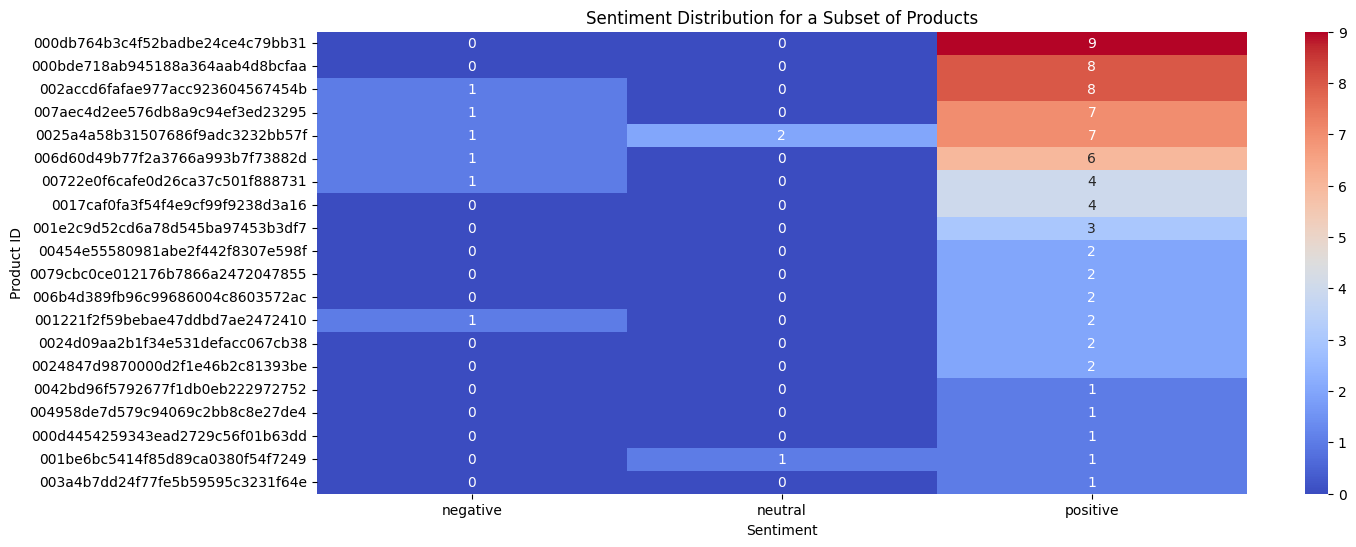

In [ ]:
# visualise top 20 sentiments analysis on product `uniq_id`

# set sizes
plt.figure(figsize=(15, 6))

subset_sentiment_by_product = sentiment_by_product.head(20).sort_values(by=["positive"],ascending=False)  # Selecting a subset of products for visualization
sns.heatmap(subset_sentiment_by_product[['negative', 'neutral', 'positive']], annot=True, fmt=".0f", cmap="coolwarm")

plt.title('Sentiment Distribution for a Subset of Products')
plt.xlabel('Sentiment')
plt.ylabel('Product ID')
plt.show()

In [ ]:
# Merge : users_r_reviewers_merged_df and products_df
merged_df = pd.merge(users_r_reviewers_merged_df, products_df, on='uniq_id', how='inner')

## 4. Data Analysis and Sentiment Analysis

In [ ]:
# 1. Question : What is the overall customer satisfaction for different product categories?

df = merged_df.copy()

df['category_c'] = df['name'].apply(lambda x: x.split()[0] if pd.notnull(x) else 'unknown')

# Group by category and calculate the average score
category_avg_score = df.groupby('category_c')['score'].mean().reset_index()

# Sort the categories based on average score
category_avg_score = category_avg_score.sort_values(by='score', ascending=False)

# Display the results
category_avg_score.head(10)  # Displaying top 10 categories for brevity


,category_c,score
358,Lil,5.0
500,Preston,5.0
479,Peak,5.0
28,ASICS®,5.0
193,DragonFly™,5.0
352,Leisure,4.0
194,Drive,4.0
130,Chantal®,4.0
232,ForeverMine®,4.0
8,100,4.0


### Insights:
These results indicate the average customer satisfaction level for different product categories based on the review scores. Categories like "Lil," "Preston," "Peak," "ASICS," and "DragonFly" have the highest average scores, suggesting high customer satisfaction

In [ ]:
# 2. Question : Which products are the most and least popular, based on sales and reviews?
df = merged_df.copy()


product_popularity = df.groupby('uniq_id').agg({'review': 'count', 'score': 'mean'}).reset_index()
product_popularity.rename(columns={'review': 'review_count', 'score': 'average_score'}, inplace=True)

# Sort products by review count to find the most and least reviewed products
most_reviewed_products = product_popularity.sort_values(by='review_count', ascending=False).head(10)
least_reviewed_products = product_popularity.sort_values(by='review_count', ascending=True).head(10)

# Sort products by average score to find the highest and lowest rated products
highest_rated_products = product_popularity.sort_values(by='average_score', ascending=False).head(10)
lowest_rated_products = product_popularity.sort_values(by='average_score', ascending=True).head(10)

# Merge with products_df to get product details
most_reviewed_products_details = pd.merge(most_reviewed_products, products_df, on='uniq_id', how='left')
least_reviewed_products_details = pd.merge(least_reviewed_products, products_df, on='uniq_id', how='left')
highest_rated_products_details = pd.merge(highest_rated_products, products_df, on='uniq_id', how='left')
lowest_rated_products_details = pd.merge(lowest_rated_products, products_df, on='uniq_id', how='left')

# Display results for most and least reviewed products
print(most_reviewed_products_details[['name', 'review_count', 'average_score']],end="\n\n\n")
print(least_reviewed_products_details[['name', 'review_count', 'average_score']],end="\n\n")

                                                name  review_count  \
0                      liz claiborne® bermuda shorts            23   
1                      liz claiborne® bermuda shorts            23   
2  dirt devil® vigor cyclonic pet bagless upright...            17   
3  dyson® cinetic™ big ball animal upright vacuum...            16   
4  lg energy star® 30 cu. ft. super capacity 3-do...            14   
5  ge® energy star® 25.4 cu. ft. side-by-side ref...            14   
6     liz claiborne® city-fit skinny boyfriend jeans            14   
7                   jcpenney home™ flannel sheet set            14   
8     liz claiborne® city-fit skinny boyfriend jeans            14   
9  st. johns bay® long-sleeve cable crewneck sweater            13   

   average_score  
0       1.782609  
1       1.478261  
2       1.941176  
3       1.187500  
4       1.642857  
5       1.714286  
6       1.500000  
7       1.214286  
8       1.214286  
9       1.384615  


                  

In [ ]:
# merged_df_2 = get_or_lowercase_categorical_columns(df = merged_df,inplace=True)

In [ ]:
# 3. Question : Can we segment customers based on their purchasing behavior and preferences?
from datetime import datetime

df = merged_df.copy()

# Convert DOB to age for segmentation purposes
def calculate_age(dob):
    today = datetime.now()
    return today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))

df['age'] = df['dob'].apply(calculate_age)


# Group by Username and calculate metrics for segmentation
segmentation_data = df.groupby('username').agg({
    'review': 'count',
    'score': 'mean',
    'price': 'mean',
    'age': 'first',
    'state': 'first',
    'name': lambda x: list(set(x)),
    'category':lambda x: list(set(x)),
}).reset_index()

# Rename columns for clarity
segmentation_data.rename(columns={'review': 'review_count', 'score': 'average_score'}, inplace=True)

# sort by age, review_count and state
segmentation_data.head(10).sort_values(by=["age","review_count","state"],ascending=False)

,username,review_count,average_score,price,age,state,name,category
7,aaoj3233,7,0.714286,44.414286,72,california,[worthington® mixed media open back blouse - p...,"[new arrivals, shirts & tops, coats & jackets,..."
8,aarw4144,7,1.142857,57.780000,71,vermont,"[stylus™ linen crop pants, a.n.a® ponte knit p...","[view all, underwear & socks, food storage, co..."
5,aajn1114,5,1.000000,43.060000,66,california,"[champion® rugby shorts, izod® flat-front pant...","[workout clothes, sale, capris & crops, essent..."
1,aage1132,8,1.250000,61.671250,65,missouri,"[st. johns bay® worry free flat-front pants, l...","[view all, sale, women's pants, school uniform..."
4,aajh3423,7,1.714286,63.414286,65,vermont,[made for life™ short-sleeve sienna medallion ...,"[hoodies & fleece, view all mens clearance, al..."
0,aaez2213,8,1.000000,66.045000,64,minor outlying islands,"[nike® glow reactor dri-fit tee, liz claiborne...","[curtains & drapes, arizona, pants & jeans, pa..."
3,aahc4142,4,1.750000,66.437500,56,nebraska,"[dockers® signature slim-fit pants, nike® na s...","[cotton, jeans, sale, view all brands]"
9,aatw3332,4,1.500000,49.920000,55,west virginia,[st. johns bay® short-sleeve crewneck tee - pl...,"[guy's sleepwear, st. john's bay, tankinis, co..."
2,aagf4423,9,0.888889,164.704444,49,utah,[samsonite® swerv 28 expandable hardside spinn...,"[sealy, view all luggage, casual shoes, food s..."
6,aakg1123,7,2.000000,89.382857,25,new jersey,"[st. johns bay® long-sleeve crewneck t-shirt, ...","[view all, view all stafford, jeans, pillows &..."


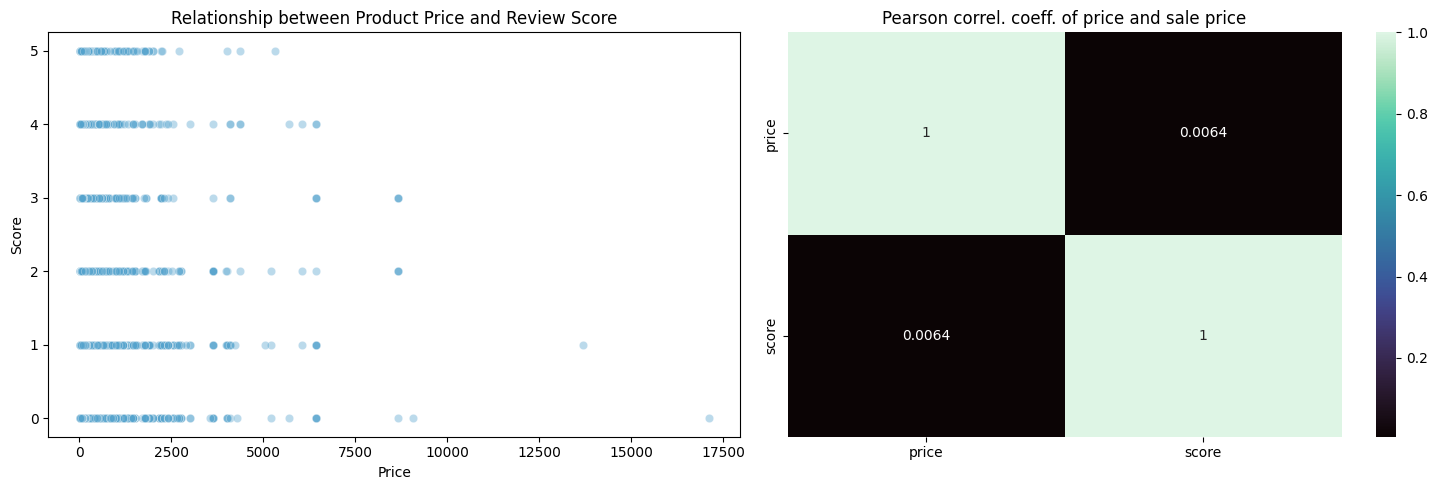

In [ ]:
# 4. Question : How does pricing affect customer reviews and purchase decisions?

df_cols = merged_df[["price","score"]]

# lets visualise on a scatterplot.
fig, axs = plt.subplots(1,2, figsize=[15,5])
sns.scatterplot(data = df_cols,
                x = "price",
                y = "score",
                ax=axs[0],
                alpha=0.4).set(title="Relationship between Product Price and Review Score",
                               xlabel="Price",
                               ylabel="Score")

# lets visualise pearsons coerrelation coefficient
sns.heatmap(df_cols.corr("pearson"),
            ax=axs[1],
            annot=True,cmap = 'mako').set(title="Pearson correl. coeff. of price and sale price")
fig.tight_layout()

### insight :
The correlation coefficient between price and review score is approximately 0.0064, which is very close to zero. This indicates a very weak or negligible linear relationship between the price of products and the review scores they receive.

Based on this analysis, we can conclude that pricing does not have a significant impact on the review scores of products. This suggests that customers' perceptions of product quality, as reflected in their reviews, are not strongly influenced by the price of the product.

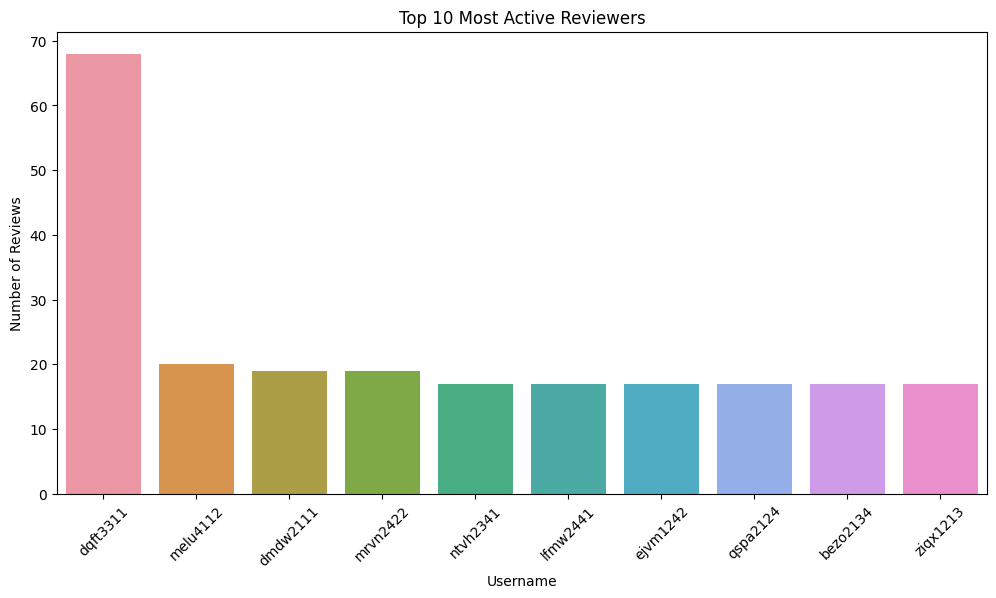

In [ ]:
# 5. Who are the 10 most active reviewers

# Analysis 3: User engagements on review
user_activity = users_r_reviewers_merged_df['username'].value_counts()

# Getting the top 10 most active users
top_10_active_users = user_activity.nlargest(10)

# Plotting the number of reviews by the top 10 most active users
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_active_users.index, y=top_10_active_users.values)
plt.title('Top 10 Most Active Reviewers')
plt.xlabel('Username')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

### Insights :
The dataset has a wide range of user activity levels, with a few users contributing a large number of reviews. The most active user, "dqft3311," has submitted significantly more reviews than others. This indicates that a small group of users is highly active in terms of review submission.